# Mortalidad en accidentes de tránsito

In [20]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import csv
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

Leemos el conjunto de datos.

In [2]:
df = pd.read_csv("dataset/seatbelts.csv") 

Visualizamos nuestro conjunto de datos.

In [6]:
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0
...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1
188,122,1444,643,429,20195,0.114093,7,1
189,120,1575,641,408,19928,0.116466,7,1
190,137,1737,711,490,18564,0.116026,4,1


In [4]:
df.describe()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,122.802083,1670.307292,837.218750,401.208333,14993.604167,0.103624,9.057292,0.119792
std,25.379886,289.610958,175.098967,83.102210,2938.049207,0.012176,3.636903,0.325567
min,60.000000,1057.000000,426.000000,224.000000,7685.000000,0.081179,2.000000,0.000000
25%,104.750000,1461.750000,715.500000,344.750000,12685.000000,0.092577,6.000000,0.000000
50%,118.500000,1631.000000,828.500000,401.500000,14987.000000,0.104477,8.000000,0.000000
75%,138.000000,1850.750000,950.750000,456.250000,17202.500000,0.114056,12.000000,0.000000
max,198.000000,2654.000000,1299.000000,646.000000,21626.000000,0.133027,17.000000,1.000000


In [5]:
df.shape

(192, 8)

Como la tarea principal del conjunto de datos se centrará en el antes y el después de la introducción de la legislación sobre el cinturón de seguridad, es conveniente dividir el conjunto de datos en dos: 
* uno de antes de la legislación (etiquetado como law=0)
* y uno de después de la legislación (etiquetado como law=1)

Así pues, primero cuántos datos hay en cada uno de estos conjuntos.

In [7]:
print(df.groupby('law').size())

law
0    169
1     23
dtype: int64


<AxesSubplot:>

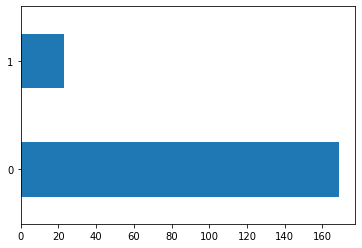

In [32]:
df['law'].value_counts().plot(kind='barh')

Y luego separamos los datos en dos dataframes distintos.

In [8]:
sinley = df.loc[df['law'] == 0] # Con un tamaño de 169 entradas.

In [10]:
sinley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0


In [11]:
conley = df.loc[df['law'] == 1] # Con un tamaño de 23 entradas.

In [12]:
conley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
169,95,1057,426,300,15511,0.113657,3,1
170,100,1218,475,318,18308,0.113144,2,1
171,89,1168,556,391,17793,0.118496,6,1
172,82,1236,559,398,19205,0.117969,3,1
173,89,1076,483,337,19162,0.117687,7,1


Contamos el número de personas en cada uno de los conjuntos.

In [27]:
sinley['drivers'].sum()

290300

In [28]:
conley['drivers'].sum()

30399

Contamos el número de personas muertas en cada uno de los conjuntos.

In [29]:
sinley['DriversKilled'].sum()

21272

In [30]:
conley['DriversKilled'].sum()

2306

Por lo tanto, 
* P$\left(\frac{21272}{290300}\right) = 0.0732$

* P$\left(\frac{2306}{30399}\right) = 0.0758$

In [36]:
law_front = pd.crosstab(index=sinley["law"], 
                        columns=sinley["front"])

In [37]:
law_front

front,567,593,595,607,616,619,626,633,643,644,...,1115,1121,1132,1147,1171,1190,1194,1204,1208,1299
law,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
